In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv(r'../Data/Google-Playstore.csv')
df.head()


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


# EDA

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [77]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [78]:
df.isnull().sum()
#excluir valores nulos de las columnas y ver que nos pueden ofrecer
#

App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
# Eliminar las filas que tengan valores nulos en las columnas específicas
'''
df = df.dropna(subset=['Rating', 'Rating Count', 'Installs', 'Minimum Installs', 
                       'Currency', 'Size', 'Minimum Android', 'Developer Id', 
                       'Developer Website', 'Developer Email', 'Released', 
                       'Privacy Policy'])
'''

"\ndf = df.dropna(subset=['Rating', 'Rating Count', 'Installs', 'Minimum Installs', \n                       'Currency', 'Size', 'Minimum Android', 'Developer Id', \n                       'Developer Website', 'Developer Email', 'Released', \n                       'Privacy Policy'])\n"

### Separación de variables

In [81]:
variables_numericas = df.select_dtypes(include=['int64', 'float64'])
variables_categoricas = df.select_dtypes(include=['object', 'category'])
variables_booleanas = df.select_dtypes(include=['bool'])

In [82]:
variables_numericas

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
0,0.0,0.0,10.0,15,0.0
1,4.4,64.0,5000.0,7662,0.0
2,0.0,0.0,50.0,58,0.0
3,5.0,5.0,10.0,19,0.0
4,0.0,0.0,100.0,478,0.0
...,...,...,...,...,...
2312939,4.3,16775.0,100000.0,337109,0.0
2312940,0.0,0.0,100.0,430,0.0
2312941,0.0,0.0,100.0,202,0.0
2312942,3.5,8.0,1000.0,2635,0.0


In [83]:
variables_categoricas

,App Name,App Id,Category,Installs,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,10+,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,"5,000+",USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,50+,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,10+,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,100+,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,"100,000+",USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,100+,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,100+,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,"1,000+",USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,2021-06-16 12:59:19


In [84]:
variables_booleanas

,Free,Ad Supported,In App Purchases,Editors Choice
0,True,False,False,False
1,True,True,False,False
2,True,False,False,False
3,True,True,False,False
4,True,False,False,False
...,...,...,...,...
2312939,True,False,False,False
2312940,True,False,False,False
2312941,True,False,False,False
2312942,True,True,False,False


### Outliers

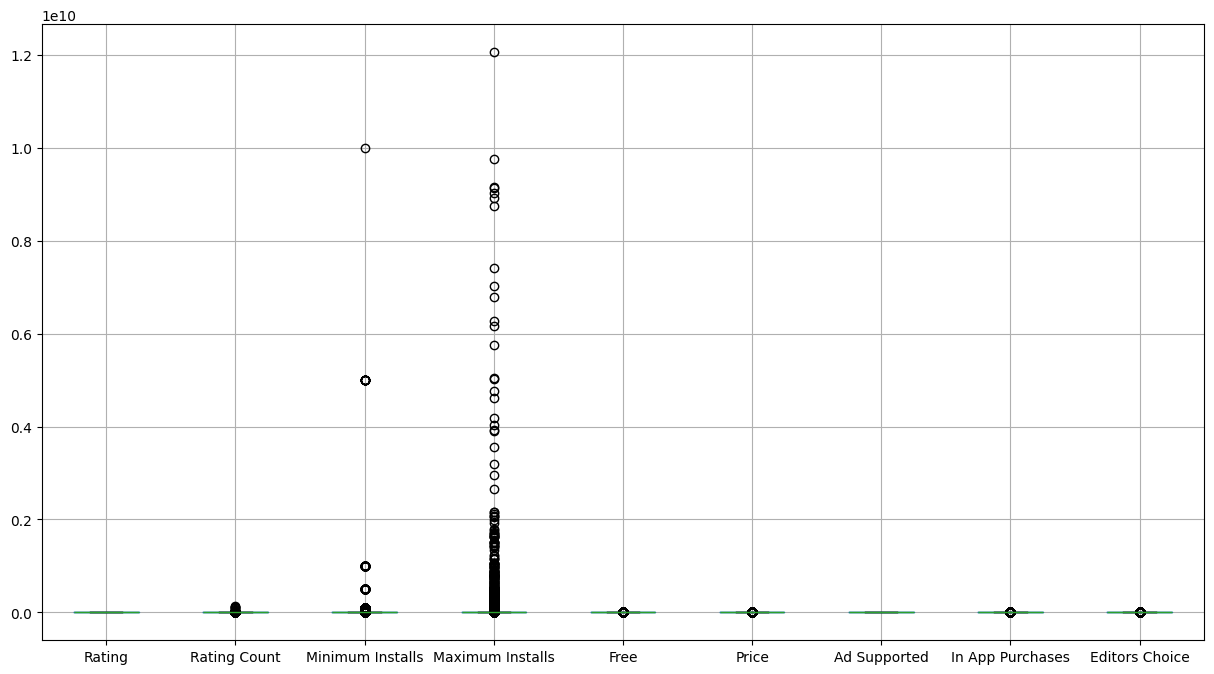

In [85]:
df.boxplot(figsize=(15,8))
plt.show()

Maximum Installs y Minimum Installs son las variables que presentan más outliers. Las aplicaciones que tienen un gran número de instalaciones probablemente distorsionen algunas métricas si no se tratan.
El Rating Count tiene algunos valores extremos, lo que sugiere que unas pocas apps tienen una cantidad desproporcionada de valoraciones.
Las demás variables no muestran una gran variación ni valores atípicos.
Posibles acciones:
Eliminar o transformar outliers: Podrías eliminar o transformar los valores atípicos en Maximum Installs y Minimum Installs para que no afecten de manera negativa el análisis posterior.
Normalizar variables: Al trabajar con datos donde hay gran disparidad entre las variables (como instalaciones), podrías considerar normalizar o estandarizar estas variables para un análisis más equitativo.
Segmentar análisis: Dividir las apps en diferentes grupos según el número de instalaciones para ver si los patrones se mantienen.

#### Variables Numéricas

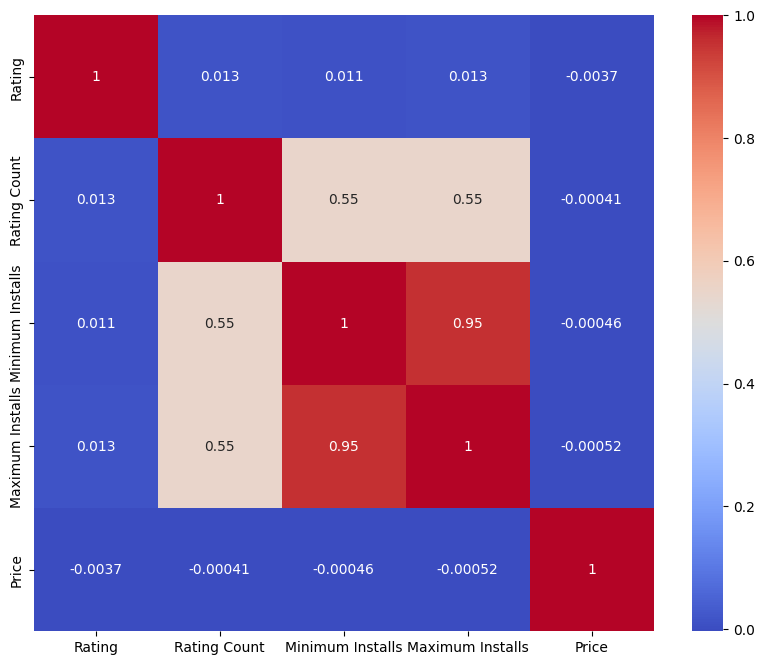

In [86]:
matriz_correlacion = variables_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()

azul -> correlaciones negativas

rojo -> correlaciones positivas

Rojo hacia indica una correlación positiva fuerte. Cuando el valor de una variable aumenta, la otra también lo hace.
Azul hacia uno indica una correlación negativa fuerte. Cuando el valor de una variable disminuye, la otra también.
Los valores claros o cercanos a cero tiene poca o nula correlación entre las variables.


Rating y Rating Count tienen una correlación baja (0.013), lo que indica que el número de valoraciones no influye mucho en la calificación promedio.
Rating Count y Maximum/Minimum Installs tienen una correlación positiva moderada (0.55), lo que sugiere que a medida que las instalaciones aumentan, también lo hacen las valoraciones.
Minimum Installs y Maximum Installs están altamente correlacionados (0.95), lo que tiene sentido, ya que ambas variables están directamente relacionadas.
Price tiene una correlación casi nula con todas las variables, lo que significa que el precio no parece influir en las calificaciones, valoraciones o instalaciones de manera significativa.
1. Fuerte correlación entre Minimum Installs y Maximum Installs (0.95)
Interpretación: Las aplicaciones que tienen un alto número mínimo de instalaciones suelen tener también un alto número máximo de instalaciones. Esto es esperable, ya que las cifras de instalación mínima y máxima tienden a moverse juntas.
Acción adicional: Si estas variables están tan altamente correlacionadas, puede que sea útil mantener solo una de ellas en el análisis futuro, ya que aportan información redundante.
2. Moderada correlación entre Rating Count y Minimum Installs/Maximum Installs (0.55)
Interpretación: Las aplicaciones que tienen más instalaciones también tienden a tener más valoraciones. Este es un comportamiento lógico, ya que cuantas más personas instalan una app, mayor será la probabilidad de que la valoren.
Acción adicional: Esta relación sugiere que podrías profundizar en cómo las valoraciones afectan a la popularidad de una aplicación. Podrías analizar si hay algún umbral de instalaciones que aumente significativamente el número de valoraciones o viceversa.
3. Relación débil entre Rating y otras variables
Interpretación: Rating (la calificación promedio) tiene correlaciones muy bajas con todas las demás variables. Esto indica que el número de instalaciones, el precio, o el número de valoraciones no tienen un impacto fuerte sobre la calificación que recibe una app.
Acción adicional: Podrías explorar si hay otras variables no incluidas en este análisis que afecten más a las calificaciones, como por ejemplo las reseñas de los usuarios o la categoría de la aplicación. También puedes investigar si las aplicaciones con muchas instalaciones y malas valoraciones tienden a mejorar su puntuación a lo largo del tiempo.
4. Correlación casi nula entre Price y las demás variables
Interpretación: El Price no parece estar relacionado con el número de valoraciones, el número de instalaciones o la calificación promedio. Esto podría indicar que el precio no es un factor determinante en la popularidad de las apps en este dataset.
Acción adicional: Tal vez podrías analizar si existen relaciones entre el precio y otras características cualitativas, como la categoría de la app o si el precio influye en la retención de usuarios.
5. Posibles outliers
El gráfico de correlación no te da información directa sobre outliers, pero si ves alguna variable con valores extremadamente altos o bajos, podría ser útil hacer gráficos adicionales, como boxplots o scatterplots (diagramas de dispersión), para identificar aplicaciones que están fuera del rango normal.
6. Relaciones no lineales
La correlación solo captura relaciones lineales entre variables. Es posible que haya relaciones no lineales entre variables que no se reflejan en esta matriz de correlación. Por ejemplo, una app podría recibir muchas valoraciones solo después de alcanzar cierto número de instalaciones. Podrías explorar gráficos como diagramas de dispersión con líneas de tendencia para identificar patrones más complejos.


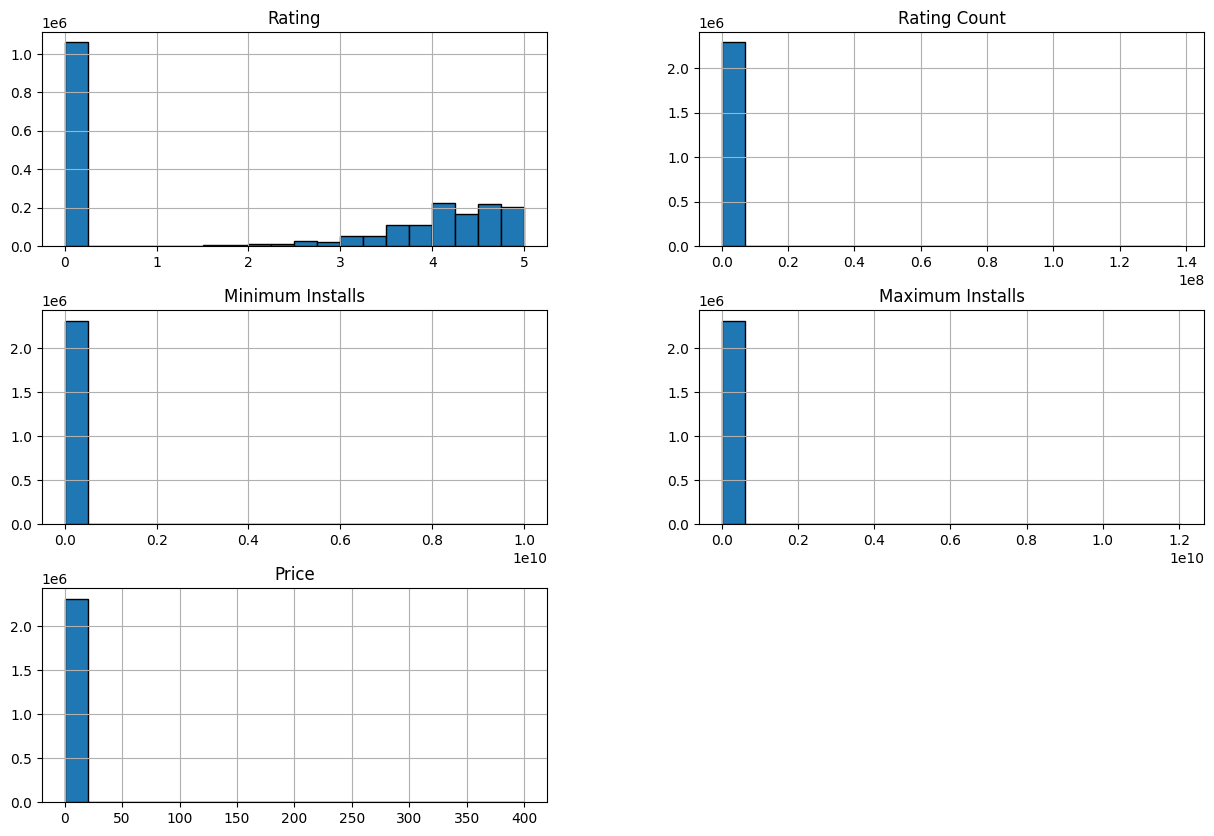

In [87]:
variables_numericas.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

1. Rating:
La mayoría de las aplicaciones tienen un rating cercano a 0, lo cual parece extraño y podría deberse a valores faltantes o datos erróneos.
Las apps que sí tienen calificaciones parecen estar distribuidas entre los valores de 4 y 5.
2. Rating Count:
La mayoría de las aplicaciones tienen una baja cantidad de valoraciones, lo que explica el pico muy pronunciado en el valor 0.
Hay unas pocas aplicaciones con un número muy alto de valoraciones (fuera del rango visible del histograma), lo que indica que algunas apps son extremadamente populares en comparación con la mayoría.
3. Minimum Installs:
La mayoría de las aplicaciones tienen un número de instalaciones mínimo muy bajo, lo que indica que muchas aplicaciones están en su fase inicial o tienen pocos usuarios.
Hay un número muy pequeño de apps que tienen valores extremos en instalaciones mínimas, como se ve por los valores muy altos en el eje x.
4. Maximum Installs:
Similar a Minimum Installs, la gran mayoría de las aplicaciones tienen pocos usuarios en términos de instalaciones máximas.
Hay unas pocas aplicaciones extremadamente populares que se salen del rango del gráfico, lo cual puede ser distorsionante para el análisis general si no se maneja adecuadamente.
5. Price:
La mayoría de las aplicaciones parecen ser gratuitas o tienen un precio cercano a cero, dado el pico en el valor 0.
Existen algunas aplicaciones con precios mucho más altos, lo cual indica que una minoría de apps es premium o tiene precios significativos.

Sesgo hacia valores bajos: La mayoría de las aplicaciones tienen ratings, installs y valoraciones bajas, lo que refleja una gran cantidad de apps menos populares.
Valores extremos (outliers): Tanto en Maximum Installs como en Rating Count, hay valores muy extremos que podrían afectar el análisis. Estos valores podrían analizarse por separado o considerarse como casos especiales.
Precio: Casi todas las aplicaciones son gratuitas, pero algunas pocas tienen precios altos.

Recomendaciones:
Transformación de los datos: Podrías aplicar transformaciones logarítmicas a las variables de Installs y Rating Count para suavizar el impacto de los valores extremos y facilitar el análisis.
Análisis segmentado: Considerar dividir el análisis entre apps muy populares y aquellas con menos usuarios, para observar patrones más claros en cada segmento.
Limpieza de datos: Revisa los ratings que aparecen cercanos a 0, ya que no es común que las aplicaciones tengan tan malas calificaciones de manera masiva.

# Pasarlo a excel

In [88]:
#df = df.head(1000000)

In [89]:
#df.to_excel('Google-Playstore.xlsx', index=False)